In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
data = pd.read_csv("Fish.csv")
df = pd.get_dummies(data,prefix='Species',drop_first=True)
X = df.drop('Weight',axis=1).values
y = df['Weight'].values
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
df.isna()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False
157,False,False,False,False,False,False,False,False,False,False,False,False


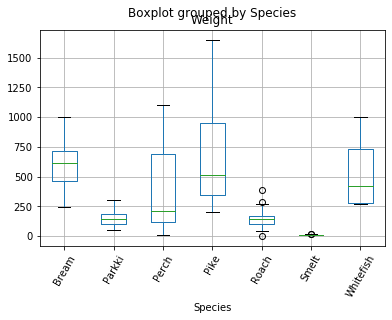

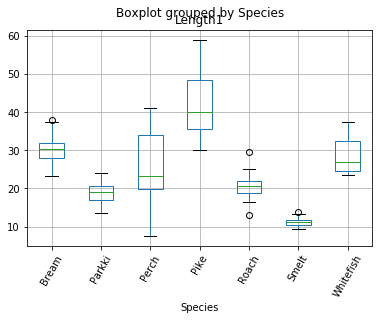

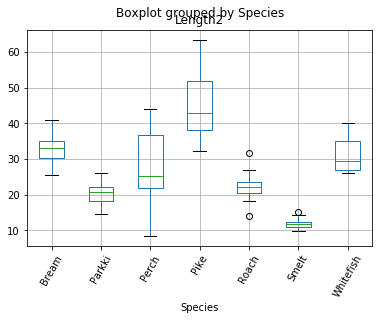

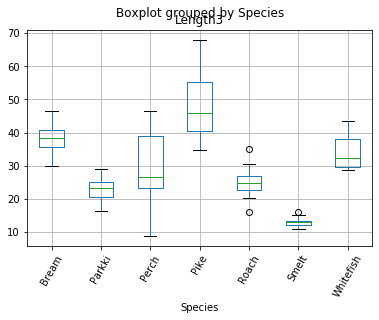

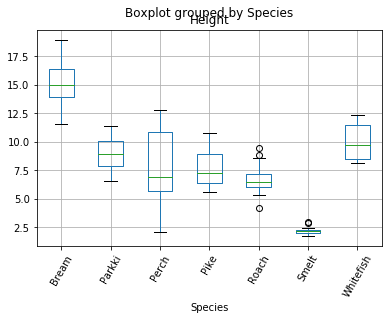

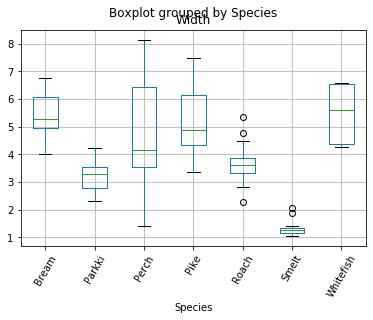

In [4]:
data.boxplot('Weight','Species',rot=60)

data.boxplot('Length1','Species',rot=60)

data.boxplot('Length2','Species',rot=60)

data.boxplot('Length3','Species',rot=60)

data.boxplot('Height','Species',rot=60)

data.boxplot('Width','Species',rot=60)

plt.show()

In [5]:
X_train,X_test,y_train,y_test = ms.train_test_split(X,y,test_size=0.3,random_state=2)

In [46]:
clf = LinearRegression()
reg = clf.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [57]:
print("R^2 : {:.3f}".format(reg.score(X_test,y_test)))
print("RMSE : {:.3f}" .format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

R^2 : 0.919
RMSE : 92.907


In [8]:
cross_val_score(clf,X,y,cv=5)#!!!!!!!!!!!!!!!!!!anlamadım!!!!!!!

array([  0.30866139,   0.27747547, -11.11448601,   0.87255345,
         0.14293616])

In [36]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [10]:
data.groupby('Species').count()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,35,35,35,35,35,35
Parkki,11,11,11,11,11,11
Perch,56,56,56,56,56,56
Pike,17,17,17,17,17,17
Roach,20,20,20,20,20,20
Smelt,14,14,14,14,14,14
Whitefish,6,6,6,6,6,6


In [11]:
df2 = data.drop('Species',axis=1)
df2

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


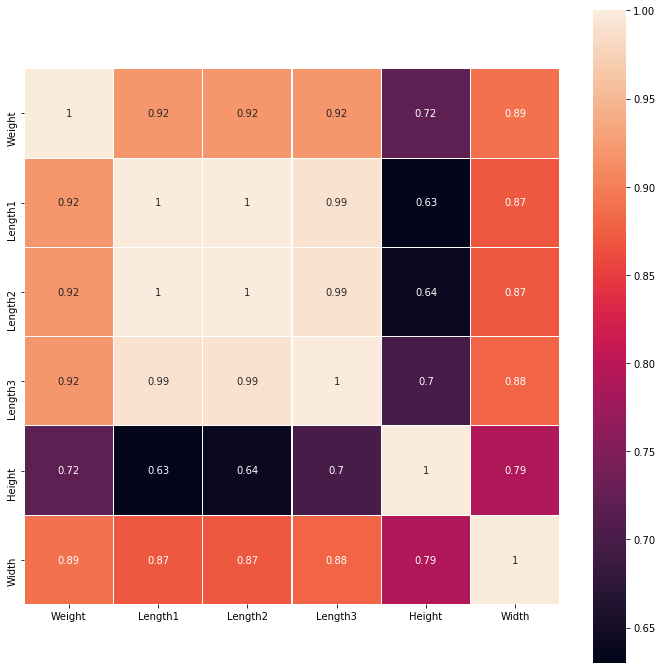

In [12]:
plt.figure(figsize=(12,12))
corr_matrix = df2.corr().round(2)
sns.heatmap(corr_matrix,annot=True,square=True,linewidths=0.1)
plt.show()

In [13]:
df3 = data.drop(['Length2','Length3'],axis=1)
df3

,Species,Weight,Length1,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340
...,...,...,...,...,...
154,Smelt,12.2,11.5,2.0904,1.3936
155,Smelt,13.4,11.7,2.4300,1.2690
156,Smelt,12.2,12.1,2.2770,1.2558
157,Smelt,19.7,13.2,2.8728,2.0672


In [14]:
df31 = pd.get_dummies(df3,'Species',drop_first=True)
df31

,Weight,Length1,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,2.0904,1.3936,0,0,0,0,1,0
155,13.4,11.7,2.4300,1.2690,0,0,0,0,1,0
156,12.2,12.1,2.2770,1.2558,0,0,0,0,1,0
157,19.7,13.2,2.8728,2.0672,0,0,0,0,1,0


In [15]:
X_1 = df31.drop('Weight',axis=1).values
y_1 = df31['Weight'].values
df31

,Weight,Length1,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,2.0904,1.3936,0,0,0,0,1,0
155,13.4,11.7,2.4300,1.2690,0,0,0,0,1,0
156,12.2,12.1,2.2770,1.2558,0,0,0,0,1,0
157,19.7,13.2,2.8728,2.0672,0,0,0,0,1,0


In [16]:
X_1_train, X_1_test, y_1_train, y_1_test = ms.train_test_split(X_1,y_1,test_size=0.3,random_state=1)

In [17]:
clf2 = LinearRegression()
reg2 = clf2.fit(X_1_train,y_1_train)

In [18]:
reg2.score(X_1_test,y_1_test)

0.9054407123585304

In [19]:
reg2.predict(X_1_test)

array([ 729.49295716,  105.38791882,  556.44952952,  173.23035255,
         71.15049505,  630.16613617,  152.06566409,  525.37488434,
         88.38389835,  235.8692811 ,  151.41578317,  195.86110051,
       -168.24774813,  381.8014838 ,  736.28261349,  157.64497103,
        177.736272  ,  535.29567193,  482.26166104,  301.85799905,
          9.26452003, -168.607791  ,  282.77661777,  450.40311351,
        112.1934532 ,  790.74605545,  599.33377541,  -77.24180555,
       1271.05260129,  181.26883223, 1048.26901278,  379.6159711 ,
        697.97250502,  381.38518877,  524.27544588,  376.63731138,
        180.34882896,  267.23965439,  893.28376774,  324.89015478,
        413.38718473,  665.59526357,  396.86504867,   16.43585727,
        538.87204616,  765.83997391,  -61.19239421,  702.40059538])

In [20]:
y_1_test

array([1000. ,  120. ,  600. ,  130. ,   85. ,  650. ,  145. ,  500. ,
          0. ,  145. ,  135. ,  150. ,   32. ,  250. ,  800. ,  110. ,
        140. ,  390. ,  320. ,  197. ,    9.8,   40. ,  180. ,  450. ,
        125. ,  955. ,  700. ,    6.7, 1550. ,  145. , 1000. ,  260. ,
        840. ,  300. ,  540. ,  300. ,  160. ,  200. ,  975. ,  270. ,
        430. ,  556. ,  250. ,   12.2,  500. ,  700. ,   51.5,  850. ])

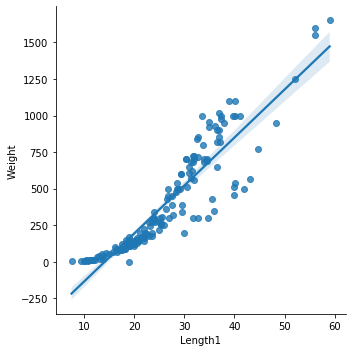

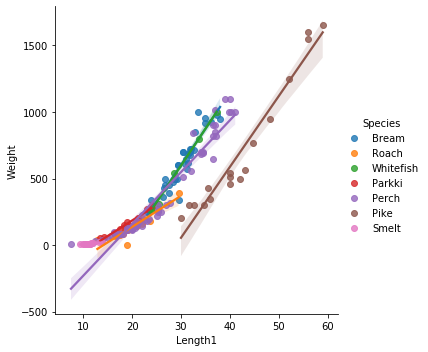

In [40]:
sns.lmplot(x="Length1",y='Weight', data = df3,order=1, legend=True)

sns.lmplot(x="Length1",y='Weight', data = df3,order=1, hue='Species', legend=True)

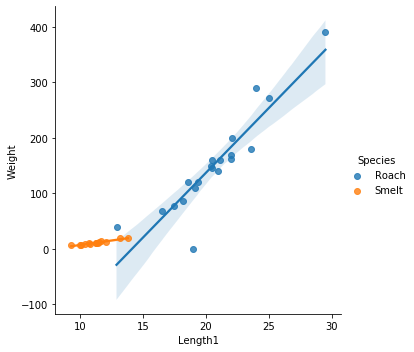

In [44]:
sns.lmplot(x="Length1",y='Weight', data = df3[df3['Species'].isin(['Smelt','Roach'])], order=1, hue='Species', legend=True)

plt.show()

In [65]:
l1_space = np.linspace(0, 1, 100)
print(l1_space)
np.arange(0,1,100)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

array([0])